In [1]:
import pandas as pd
import numpy as np 
from scipy.optimize import lsq_linear
import matplotlib.pyplot as plt

In [2]:
file_path = 'project.xlsx'
df = pd.read_excel(file_path)
print(df.head())

   Year   Malta   Bahrain  Norway  Singapore  Finland  Austria  Sweden   \
0   2006    6.80    1.107    3.40       4.48     7.72     5.24     7.07   
1   2007    6.47    1.091    2.49       3.90     6.85     4.86     6.16   
2   2008    5.98    1.110    2.55       3.96     6.37     4.13     6.23   
3   2009    6.89    1.144    3.10       5.86     8.25     5.30     8.35   
4   2010    6.85    1.130    3.52       4.12     8.39     4.82     8.61   

   Denmark  Iceland    UAE  Germany  
0     3.90     2.83  2.926    10.25  
1     3.80     2.25  2.860     8.66  
2     3.68     2.95  2.721     7.52  
3     6.41     7.22  2.668     7.74  
4     7.75     7.56  2.464     6.97  


In [9]:
df_subset = df.head(10)
A = df_subset.iloc[:, 1:11].values  
b = df_subset.iloc[:, 11].values
bounds = ([-0.75] * A.shape[1], [5] * A.shape[1])
result = lsq_linear(A, b, bounds=bounds)
x = result.x

In [11]:
result = (df.iloc[:, 1:11] * x).sum(axis=1)
print("Synthetic unemployment rates:")
print(result)

Synthetic unemployment rates:
0     9.748365
1     8.795648
2     7.890023
3     7.721155
4     6.820323
5     5.924325
6     5.313678
7     5.510931
8     4.692275
9     4.834433
10    4.292603
11    1.398291
12    1.614402
13    1.660192
dtype: float64


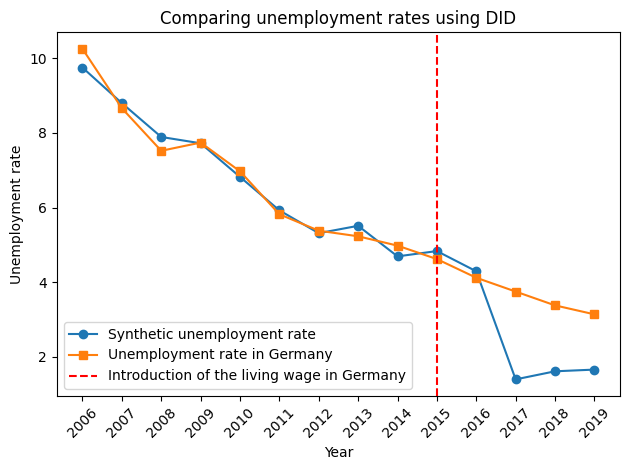

In [12]:
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
result = np.array(result)
last_column = df.iloc[:, -1].values

plt.plot(result, label='Synthetic unemployment rate', marker='o')
plt.plot(last_column, label='Unemployment rate in Germany', marker='s')

plt.axvline(x=years.index(2015), color='red', linestyle='--', label='Introduction of the living wage in Germany')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Unemployment rate')
plt.title('Comparing unemployment rates using DID')

plt.xticks(np.arange(len(years)), years, rotation=45)


plt.tight_layout()  
plt.show()